How runtime has changed over time, and whether this can be correlated to other factors.   


In [2]:
%matplotlib notebook
#import dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#read the csv into dataframe
netflix_shows_df = pd.read_csv('../../Resources/clean_netflix_shows.csv',index_col=0)


In [4]:
#display dataframe
netflix_shows_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Omdb Review Score,Omdb Review Count,Month,Year,Financial Quarter
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2.5,"1,515",August,2019,3
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,3.9,31,August,2020,3
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2.6,"1,201",December,2019,4
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,3.2,"32,162",January,2018,1
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,3.4,"1,048",October,2020,4
...,...,...,...,...,...,...,...,...,...,...,...
497,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,8.4,"4,349",December,2018,4
498,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,8.4,"13,353",October,2015,4
499,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,8.5,"2,001",December,2018,4
500,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,8.6,"1,136",December,2020,4


In [5]:
netflix_shows_df.dtypes

Title                 object
Genre                 object
Premiere              object
Runtime                int64
IMDB Score           float64
Language              object
Omdb Review Score    float64
Omdb Review Count     object
Month                 object
Year                   int64
Financial Quarter      int64
dtype: object

In [6]:
# Figure out the minimum and maximum Runtime
print(netflix_shows_df["Runtime"].max())
print(netflix_shows_df["Runtime"].min())

209
4


In [7]:
yearly_count = netflix_shows_df["Year"].value_counts()
yearly_count

2020    145
2019    109
2018     90
2017     63
2021     56
2016     29
2015      9
2014      1
Name: Year, dtype: int64

In [8]:
grouped_yearlycount = netflix_shows_df.groupby("Year")
print(grouped_yearlycount)
grouped_count = grouped_yearlycount.size()
grouped_count.head()

Year
2014     1
2015     9
2016    29
2017    63
2018    90
dtype: int64

In [9]:
average_yearly_runtime = netflix_shows_df .groupby("Year")["Runtime"].mean()

average_yearly_runtime.head(10)

Year
2014     81.000000
2015     90.444444
2016     92.758621
2017     92.793651
2018     94.844444
2019     88.082569
2020     94.262069
2021    103.267857
Name: Runtime, dtype: float64

In [10]:
#Genre data
Genre_data = netflix_shows_df["Genre"].value_counts()
Genre_data.head()

Documentary        143
Drama               63
Comedy              36
Romantic comedy     35
Thriller            28
Name: Genre, dtype: int64

In [11]:
#groupby on Year
Year_groupby = netflix_shows_df.groupby('Year')
runtime_mean= Year_groupby['Runtime'].mean()

In [12]:
runtime_mean

Year
2014     81.000000
2015     90.444444
2016     92.758621
2017     92.793651
2018     94.844444
2019     88.082569
2020     94.262069
2021    103.267857
Name: Runtime, dtype: float64

In [13]:
#Group by Genre
Genre_groupby = netflix_shows_df.groupby('Genre')
runtime_mean = Genre_groupby['Runtime'].mean()

In [14]:
sorted_on_Runtime = runtime_mean.reset_index().sort_values(by=["Runtime"])
sorted_on_Runtime

,Genre,Runtime
19,Anime / Short,4.00
14,Animation / Short,10.75
65,Musical / Short,15.00
43,Drama / Short,17.00
9,Aftershow / Interview,24.25
...,...,...
57,Horror anthology,144.00
103,War drama,145.50
106,Zombie/Heist,148.00
52,Heist film/Thriller,149.00


<IPython.core.display.Javascript object>


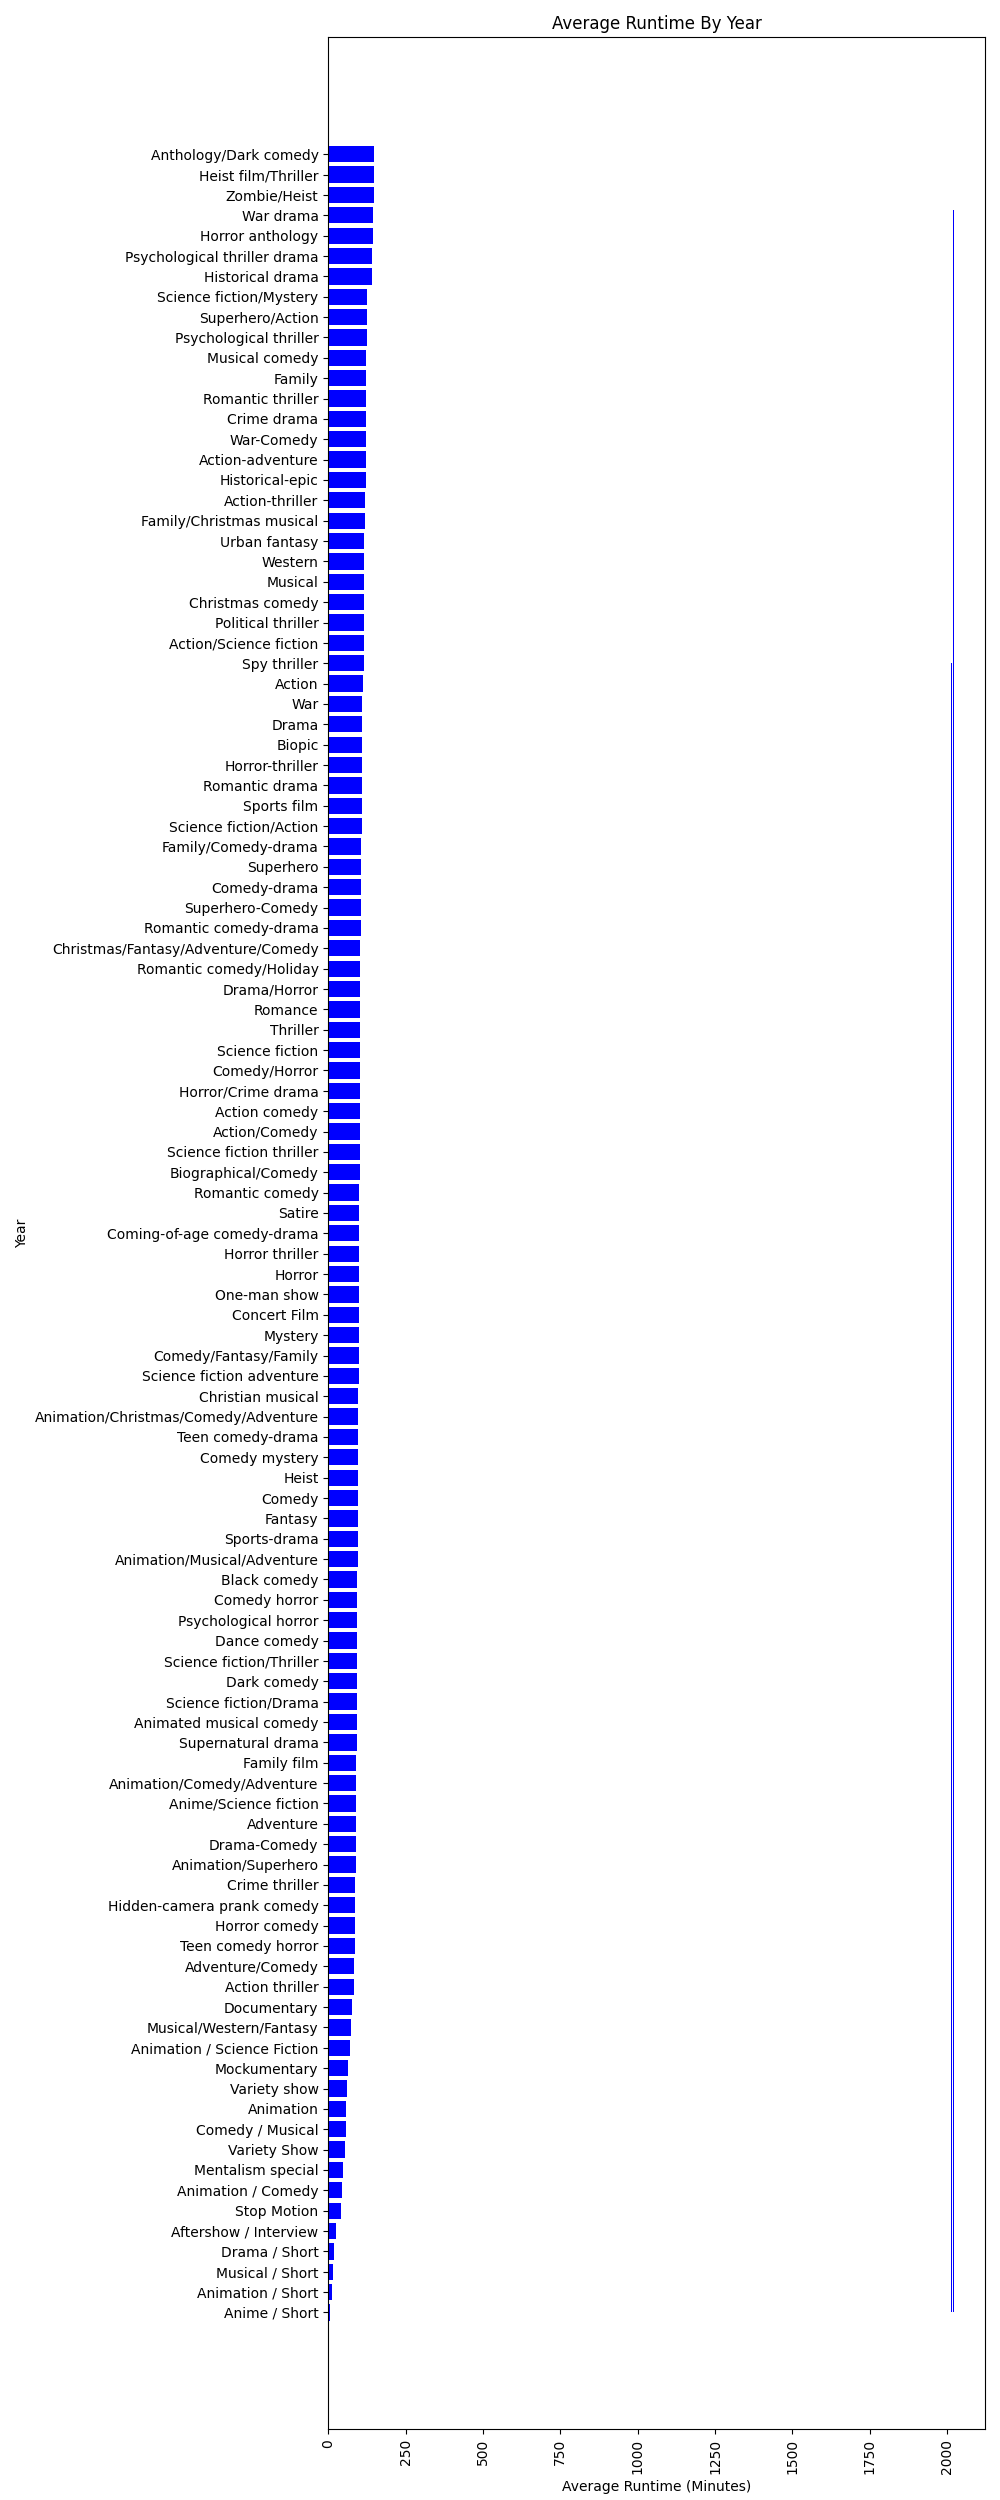

In [15]:
x_axis = sorted_on_Runtime["Genre"]
y_axis =sorted_on_Runtime["Runtime"]
plt.figure(figsize=(10,25)) 
plt.barh(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.show(block=True);

# Give the chart a title, x label, and y label
plt.title("Genre vs Average Runtime of Netflix Shows")
plt.xlabel("Average Runtime")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("../../output/3_Genre_vs_Runtime.png")

In [21]:
groupby_year = netflix_shows_df.groupby("Year")
groupby_year["Runtime"].mean()

Year
2014     81.000000
2015     90.444444
2016     92.758621
2017     92.793651
2018     94.844444
2019     88.082569
2020     94.262069
2021    103.267857
Name: Runtime, dtype: float64

<IPython.core.display.Javascript object>


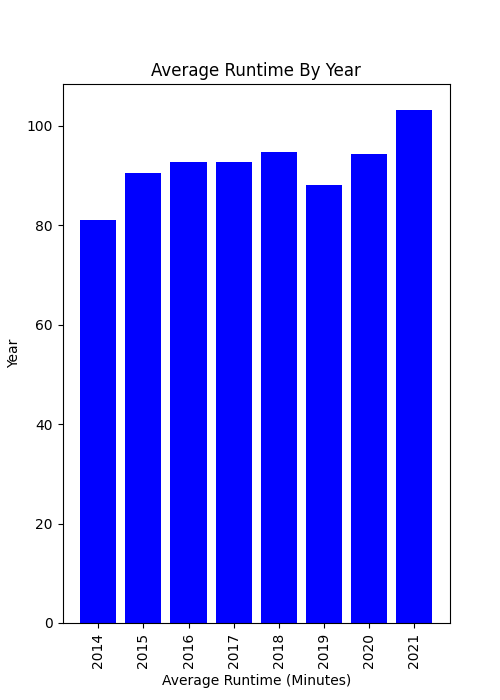

In [28]:
#plotting a Bar plot for the Year 
x_axis =groupby_year["Year"].unique()
y_axis =groupby_year["Runtime"].mean()
plt.figure(figsize=(5,7))
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.title("Average Runtime By Year")
plt.xlabel("Average Runtime (Minutes)")
plt.ylabel("Year")
plt.savefig("../../output/3_runtime_vs_year.png")